In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1])
y = np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])
print(x,y)

[2.5 0.5 2.2 1.9 3.1 2.3 2.  1.  1.5 1. ] [2.4 0.7 2.9 2.2 3.  2.7 1.6 1.1 1.6 0.9]


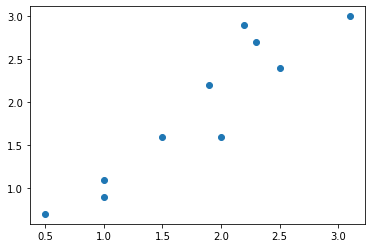

In [ ]:
plt.scatter(x,y)

In [ ]:
x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = x - x_mean
y_std = y - y_mean
cov_mat = np.cov([x_std,y_std])
print(cov_mat)

[[0.63333333 0.62666667]
 [0.62666667 0.71655556]]


In [ ]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,2).T

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print(40 * '-')

Eigenvector 1: 
[[-0.73015574]
 [ 0.68328076]]
Eigenvalue 1 from scatter matrix: 0.04689779356649226
----------------------------------------
Eigenvector 2: 
[[-0.68328076]
 [-0.73015574]]
Eigenvalue 2 from scatter matrix: 1.3029910953223962
----------------------------------------


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print(40 * '-')
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[1])

----------------------------------------
[-0.68328076 -0.73015574]
[-0.73015574  0.68328076]


In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(2,1), eig_pairs[1][1].reshape(2,1)))
print(40 * '-')
print('Matrix W: \n', matrix_w)

----------------------------------------
Matrix W: 
 [[-0.68328076 -0.73015574]
 [-0.73015574  0.68328076]]


In [ ]:
matrix_w.shape

(2, 2)

In [ ]:
x.shape

(10,)

In [ ]:
y.shape

(10,)

In [ ]:
features = np.vstack([x_std,y_std])
print(features)
features.shape

[[ 0.7  -1.3   0.4   0.1   1.3   0.5   0.2  -0.8  -0.3  -0.8 ]
 [ 0.49 -1.21  0.99  0.29  1.09  0.79 -0.31 -0.81 -0.31 -1.01]]


(2, 10)

In [ ]:
transformed = np.dot(matrix_w,features)
print(transformed)

[[-0.83607284  1.77175343 -0.99616649 -0.28007324 -1.68413474 -0.91846341
   0.08969213  1.13805076  0.43133251  1.2840819 ]
 [-0.17630145  0.12243274  0.38438566  0.12513585 -0.20442643  0.17471393
  -0.35784818  0.03066718  0.00722969 -0.10598897]]


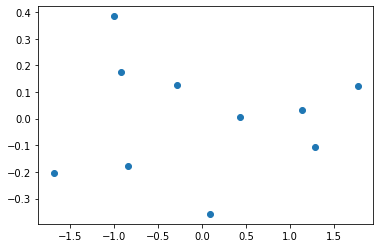

In [ ]:
plt.scatter(transformed[0,:],transformed[1,:])